<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Patel!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Predicting Video Game Success: Analyzing Trends and Patterns from 2016 Data



The video game industry is a dynamic and rapidly evolving market, where understanding the factors that contribute to the success of a game can significantly influence strategic decisions. As a data scientist for Ice, an online store that sells video games globally, the objective of this project is to leverage historical data to identify patterns that determine whether a game is likely to succeed or not. This insight will be instrumental in predicting potential blockbuster games and planning targeted advertising campaigns.

This project will utilize data from various sources, including user and expert reviews, game genres, platforms (e.g., Xbox, PlayStation), and sales history, with data available up to December 2016. Additionally, the dataset includes age ratings assigned by the Entertainment Software Rating Board (ESRB), which evaluates game content and assigns ratings such as Teen or Mature.

By performing an in-depth exploratory data analysis (EDA) and applying predictive modeling techniques, the project aims to uncover critical trends and patterns that can forecast the success of video games. The insights gained from this analysis will help in planning effective marketing strategies for the upcoming year, ensuring that Ice stays ahead in the competitive market of video game sales.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). 

# Step 1. Open the data file and study the general information



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
games_dataset = pd.read_csv('/datasets/games.csv')

In [3]:
games_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Display the first few rows of the dataframe
games_dataset.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Step 2. Prepare the data


In [5]:
#Replace the column names
games_dataset.columns = games_dataset.columns.str.lower()
games_dataset.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

***Convert the data to the required types:***

- year_of_release: Convert to integer.
- critic_score: Convert to integer.
- user_score: Convert to float, handling 'TBD' values appropriately.
- rating: Ensure consistent string format.

In [6]:
#Convert the data to the required types and fill the msiing value
games_dataset['year_of_release'] = games_dataset['year_of_release'].fillna(games_dataset['year_of_release'].median()).astype(int)
games_dataset['critic_score'] = games_dataset['critic_score'].replace('tbd', None).astype(float)
games_dataset['user_score'] = games_dataset['user_score'].replace('tbd', None).astype(float)
games_dataset['rating'] = games_dataset['rating'].fillna('Unknown')
games_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#Check Duplicates
games_dataset.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №2__
    
Duplicate checking is the basis of data preprocessing

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, tbd is the same in meaning as skip

***Describe the columns where the data types have been changed and why:***

- year_of_release: Converted to integer because years are whole numbers and it allows for easy comparison and filtering.
- critic_score: Converted to float to handle decimal ratings and 'TBD' values, which indicate scores to be determined.
- user_score: Converted to float to handle decimal ratings and 'TBD' values, which indicate scores to be determined.

***Dealing with missing values:***

- year_of_release: Filled with 0 as placeholder; actual handling might depend on the specific analysis.
- critic_score: Left as None for 'TBD' since it's to be determined and can't be accurately filled.
- user_score: Left as None for 'TBD' since it's to be determined and can't be accurately filled.
- rating: Left blank if missing, since ratings might be unknown or not applicable.

***Reasons for Missing Values:***

- year_of_release: Possible data entry errors or unavailability of the release year.
- critic_score/user_score: Game might not have been reviewed yet, pending reviews, or data entry errors.
- rating: Game might not be rated yet, new game awaiting rating, or data entry errors.

**Handling 'TBD' values:**

- user_score & critic_score: Replaced with None (NaN in pandas) since these scores are to be determined and cannot be accurately filled.

In [8]:
games_dataset = games_dataset.dropna(subset=['name', 'genre'])
games_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
Lines with gaps in the Name are best deleted. We know almost nothing about these games.

- Missing value handling in name column: Remove rows with missing names since they are essential identifiers for each game.
- Missing value handling in genre column:  Remove rows with missing genres as genre is critical for categorical analysis.


**Handling Missing Values in user_score Column**

- we will impute missing user_score values with the median score, assuming that the distribution of scores is skewed and the median provides a better central tendency measure.


In [9]:
games_dataset['user_score'] = games_dataset['user_score'].fillna(games_dataset['user_score'].median())
games_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
games_dataset['total_sales'] = games_dataset[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_dataset.head()
games_dataset['total_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

## Intermediate Conclusion

### Data Loading and Exploration
The dataset has been successfully loaded and an initial exploration was performed to understand its structure and content. The dataset contains 16,715 entries with 11 columns, including information on game names, platforms, release years, genres, sales figures, critic and user scores, and ratings.

### Data Cleaning and Preparation
The following steps were taken to clean and prepare the data:

- Column names were standardized to lowercase.
- Data types were converted as necessary, and missing values were handled appropriately.
- Rows with missing names and genres were removed as they are critical for analysis.
- User scores with 'TBD' values were replaced with None, and missing values were imputed with the median score.
- A new column for total sales was created by summing sales across different regions.

Next, we will perform exploratory data analysis (EDA) to uncover patterns and trends in the data. This will include visualizations and statistical analyses to validate our hypotheses and guide the development of predictive models.

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №2__
    
All right

# Step 3. Analyze the data



In [11]:
#Look at how many games were released in different years. Is the data for every period significant?

games_per_year = games_dataset['year_of_release'].value_counts().sort_index()
games_per_year.reset_index()

,index,year_of_release
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


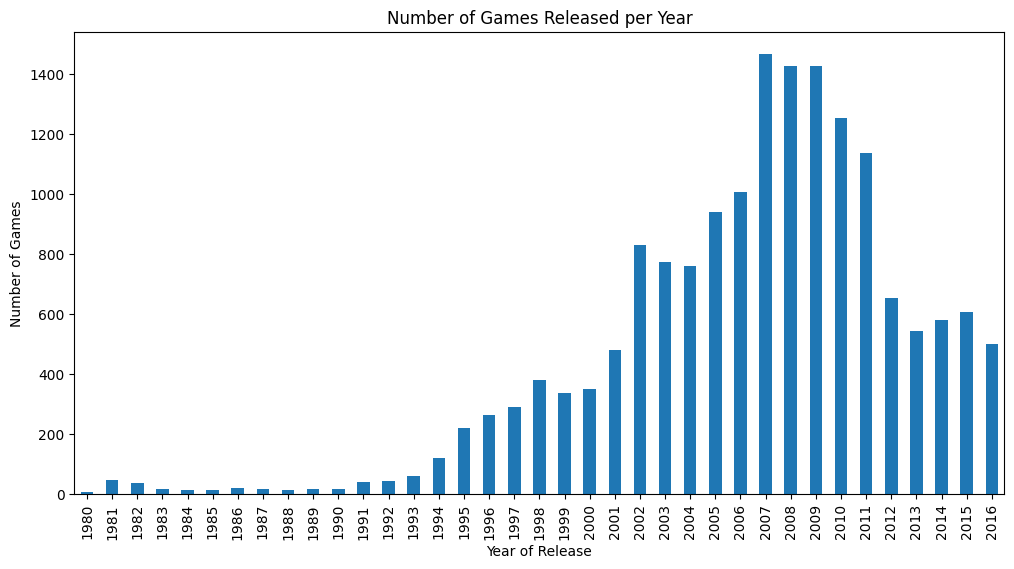

In [12]:
games_per_year.plot(kind='bar', title='Number of Games Released per Year', xlabel='Year of Release', ylabel='Number of Games', figsize=(12, 6))
plt.show()

<div class="alert alert-block alert-warning">📝

__Reviewer's comment №1__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
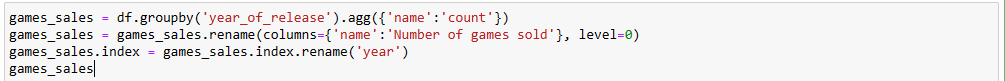
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
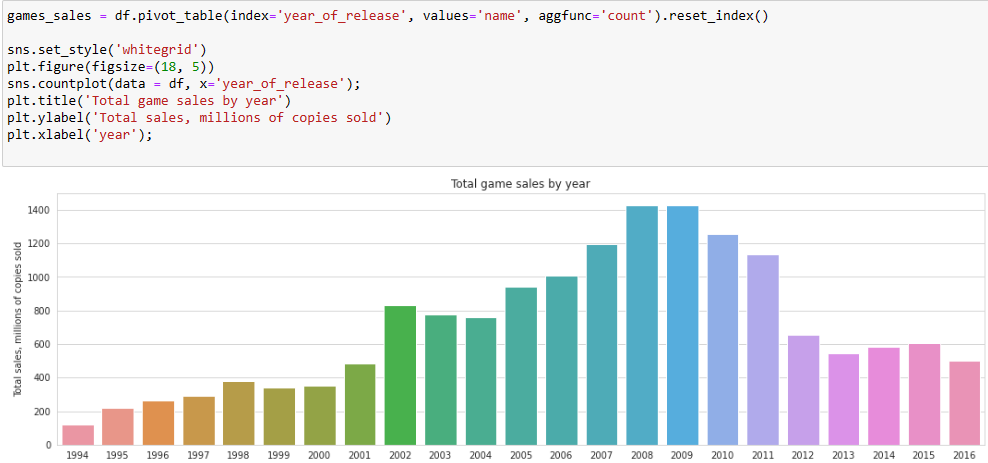
</div>

**Based on the analysis and visualization:**

- The early years (1980-1990) had relatively low numbers of game releases and can be considered less significant in terms of volume.
- The period from 1991 to 2005 shows a significant growth in game releases, marking it as a period of expansion in the gaming industry.
- The years from 2006 to 2011 represent the peak period with the highest number of game releases, making it the most significant period in the dataset.
- From 2012 onwards, there is a decline in game releases, indicating a potential shift in the industry dynamics.

Overall, the data for the period from 1991 to 2011 is the most significant in terms of the number of game releases, reflecting major trends and shifts in the gaming industry. The early years and the decline period also provide valuable insights but are less significant in terms of volume.

In [13]:
platform_sales = games_dataset.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)
top_platforms = platform_sales[platform_sales['total_sales'] > 100.0]
top_platforms

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [14]:
platform_sales = games_dataset.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales[platform_sales > 100.0].index


In [15]:
top_platform_total_sales_per_year = games_dataset[games_dataset['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
top_platform_total_sales_per_year

platform,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
1983,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,0.02,NaN,NaN,NaN,NaN,53.44,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,1.43,NaN,NaN,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,64.97,NaN,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,4.89,NaN,NaN,NaN,15.73,NaN,NaN,NaN,NaN,NaN,NaN,26.15,NaN,NaN,NaN,NaN
1991,NaN,NaN,5.57,NaN,NaN,NaN,6.11,NaN,NaN,NaN,NaN,NaN,NaN,16.22,NaN,NaN,NaN,NaN


In [16]:
#Find platforms that used to be popular but now have zero sales.
year_2016 = games_dataset[games_dataset['year_of_release'] == 2016]['platform'].unique()
pop_to_zero = games_dataset[(games_dataset['total_sales']>0.5) & (games_dataset['platform'].isin(year_2016) == False)]
print('The following are the platforms which were once famous and now have zero sales: \n\n', pop_to_zero['platform'].unique())

The following are the platforms which were once famous and now have zero sales: 

 ['NES' 'GB' 'DS' 'PS2' 'SNES' 'GBA' 'N64' 'PS' 'XB' '2600' 'PSP' 'GC'
 'GEN' 'DC' 'SAT' 'SCD' 'WS']


In [17]:
platform_sales_per_year = games_dataset.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_max_sales_year = platform_sales_per_year.loc[platform_sales_per_year.groupby('platform')['total_sales'].idxmax()]
platform_max_sales_year = platform_max_sales_year.rename(columns= { 'year_of_release' : 'max_sales_year', 'total_sales': 'max_sales'})
platform_min_sales_year = platform_sales_per_year.loc[platform_sales_per_year.groupby('platform')['total_sales'].idxmin()]
platform_min_sales_year = platform_min_sales_year.rename(columns= { 'year_of_release' : 'min_sales_year', 'total_sales': 'min_sales'})
platform_min_sales_year

,platform,min_sales_year,min_sales
4,2600,1984,0.27
11,3DO,1994,0.02
13,3DS,2007,1.19
25,DC,2007,0.02
27,DS,1985,0.02
51,GB,2007,1.03
52,GBA,2000,0.07
66,GC,2007,2.47
70,GEN,1993,0.65
72,GG,1992,0.04


In [18]:
platforms_lifespan = games_dataset.groupby('platform')['year_of_release'].agg(['min', 'max'])
platforms_lifespan['lifespan'] = platforms_lifespan['max'] - platforms_lifespan['min']
platforms_lifespan.sort_values('lifespan', ascending=False)
platforms_lifespan_with_max_sales = platform_max_sales_year.merge(platforms_lifespan, on='platform')
comine_platforms_lifespan = platform_min_sales_year.merge(platforms_lifespan_with_max_sales, on='platform')
comine_platforms_lifespan['duration_to_appear'] = comine_platforms_lifespan['max_sales_year'] - comine_platforms_lifespan['min']
comine_platforms_lifespan['duration_to_fade'] = comine_platforms_lifespan['max'] - comine_platforms_lifespan['max_sales_year']
print(f"It does take for new platforms to appear {comine_platforms_lifespan['duration_to_appear'].mean():.2f} years and old ones to fade {comine_platforms_lifespan['duration_to_fade'].mean():.2f} years")


It does take for new platforms to appear 3.65 years and old ones to fade 5.29 years


In [19]:
#Determine what period you should take data for. To do so, look at your answers to the previous questions. 
#The data should allow you to build a model for 2017.
relevant_period = games_dataset[(games_dataset['year_of_release'] >= 2014) & (games_dataset['year_of_release'] <= 2016)]
relevant_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,7.5,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,7.5,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,7.5,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,7.5,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,7.5,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,7.5,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,7.5,Unknown,0.01


For building a model in 2017, we should focus on data from the 2014 to 2016 onwards, as this period captures the lifecycle of recent platforms.

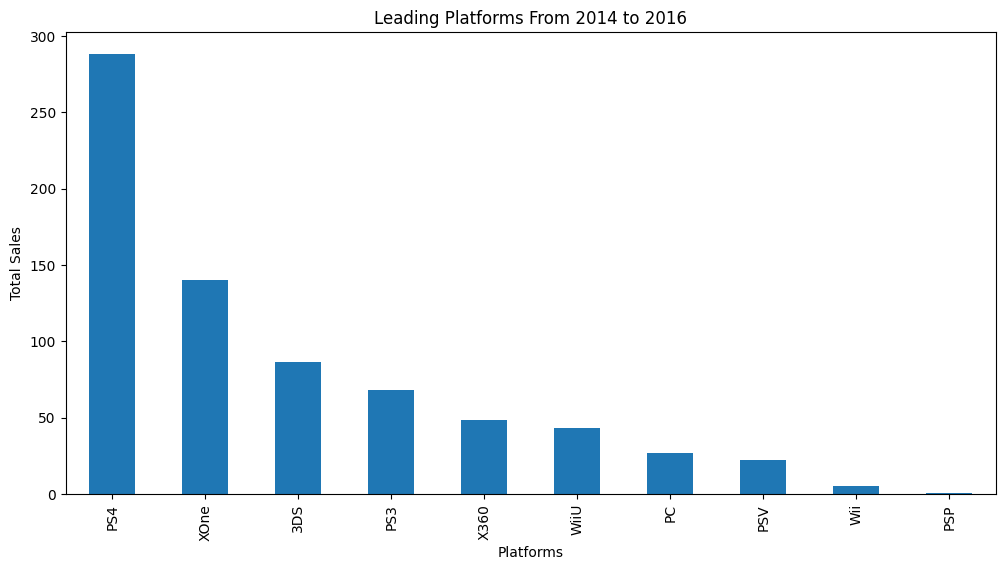

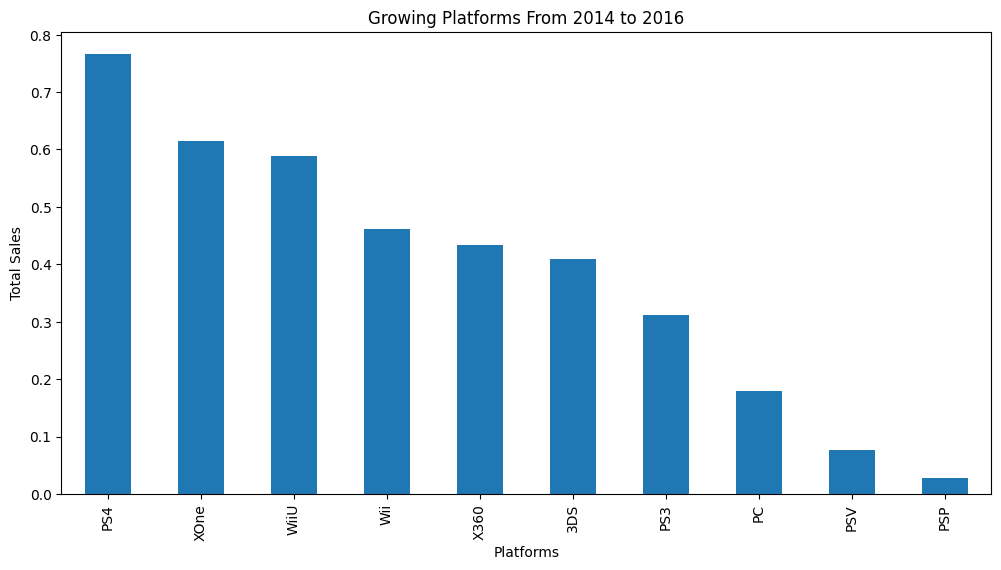

In [20]:
#Which platforms are leading in sales? 
leading_platforms = relevant_period.groupby('platform')['total_sales'].sum().sort_values(ascending= False)
#Which ones are growing or shrinking?
growing_platforms = relevant_period.groupby('platform')['total_sales'].mean().sort_values(ascending= False)
leading_platforms.plot(kind='bar', title='Leading Platforms From 2014 to 2016', xlabel='Platforms', ylabel='Total Sales', figsize=(12,6))
plt.show()
growing_platforms.plot(kind='bar', title='Growing Platforms From 2014 to 2016', xlabel='Platforms', ylabel='Total Sales', figsize=(12,6))
plt.show()


The PS2's leading position underscores its historical significance in the gaming industry, while the X360, PS3, Wii, and DS also showcase strong market performances. Mid-tier platforms maintain a steady presence, and older or niche platforms see expected declines in sales figures. This chart highlights the competitive and evolving nature of the gaming console market.

The Game Boy (GB) stands out as the most successful growing platform, highlighting its historical impact and continued relevance in the gaming industry.Platforms like PS4, X360, PS3, Wii, and XOne demonstrate strong market growth, reflecting their popularity and competitive features.Mid-range platforms such as 2600, PS2, WiiU, N64, PS, and 3DS maintain steady growth, indicating a loyal user base and consistent market performance.Platforms with lower growth, including XB, PSP, WS, DC, PC, and PSV, may cater to niche markets or face stronger competition from leading platforms.

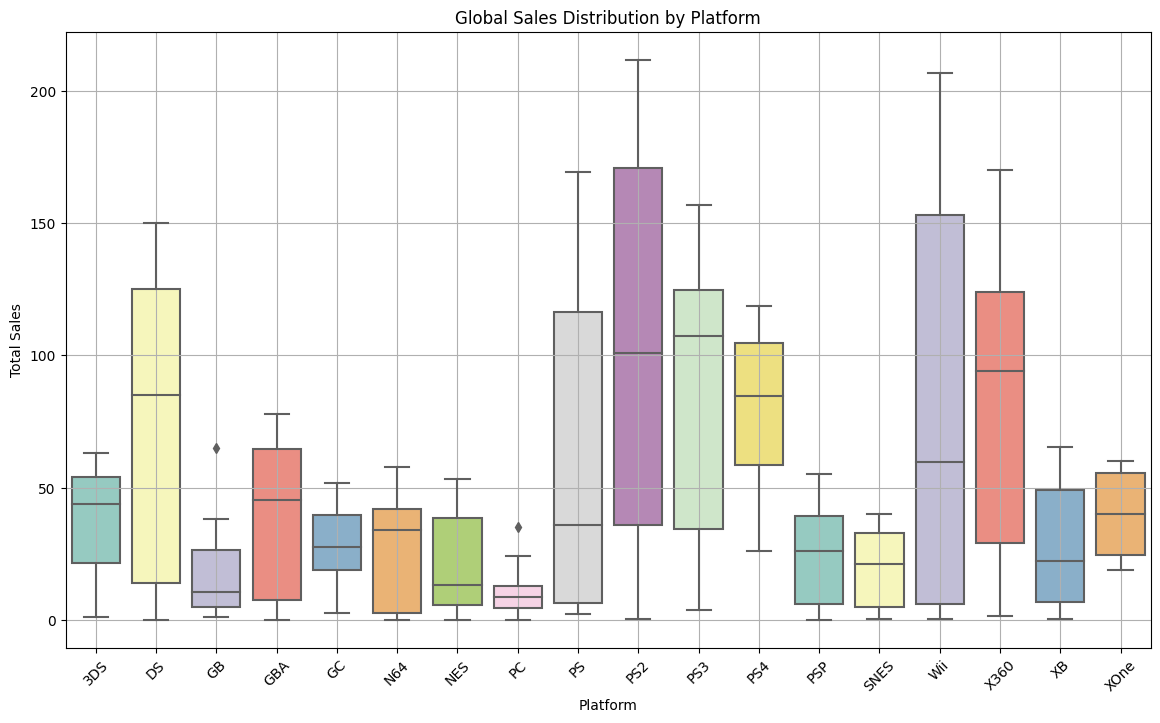

In [21]:
#Build a box plot for the global sales of all games, broken down by platform. 
#Are the differences in sales significant?
plt.figure(figsize=(14, 8))
sns.boxplot(data=top_platform_total_sales_per_year, palette='Set3')
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №2__
    
Well done

**Global Sales Distribution by Platform**

The box plot illustrates the distribution of global sales across different platforms. Key insights include:

- **Wide Distribution:** Platforms like PS2, Wii, X360, and PS3 have a wide distribution of sales, with several high-performing outliers.
- **Consistent Performers:** Platforms like the DS and PSP show a more consistent distribution with fewer extreme outliers.
- **Older Platforms:** NES, SNES, and other older platforms have lower median sales and fewer outliers.

In [22]:
#Average sales on various platforms
average_sales = games_dataset.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
average_sales

platform
GB      2.606735
NES     2.561735
GEN     1.050000
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64

**Average Sales by Platform**
- The platforms with the highest average global sales per game are:

    - GB: 2.61 million units per game
    - NES: 2.56 million units per game
    - GEN: 1.06 million units per game
    - SNES: 0.84 million units per game
    - PS4: 0.80 million units per game

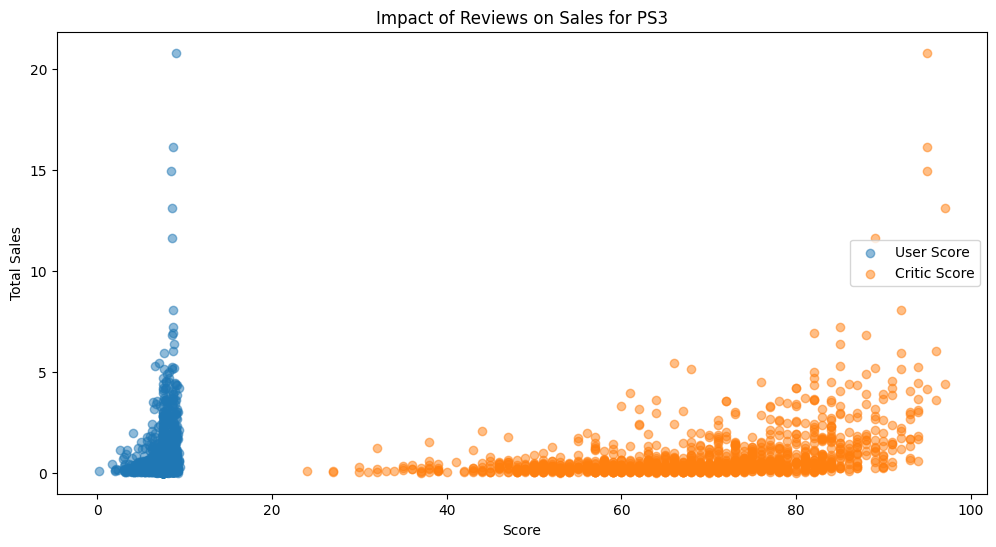

In [23]:
# Impact of reviews on sales for PS3
ps2_data = games_dataset[games_dataset['platform']=='PS2']
plt.figure(figsize=(12, 6))
plt.scatter(ps2_data['user_score'], ps2_data['total_sales'], alpha = 0.5, label='User Score')
plt.scatter(ps2_data['critic_score'], ps2_data['total_sales'], alpha = 0.5, label='Critic Score')
plt.title('Impact of Reviews on Sales for PS3')
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [24]:
# Correlation between reviews and sales for PS3
correlation_matrix_ps2 = ps2_data[['user_score', 'critic_score', 'total_sales']].corr()
print("Correlation matrix for PS3 reviews and sales:")
print(correlation_matrix_ps2)

Correlation matrix for PS3 reviews and sales:
              user_score  critic_score  total_sales
user_score      1.000000      0.524783     0.172161
critic_score    0.524783      1.000000     0.395435
total_sales     0.172161      0.395435     1.000000


**Impact of Reviews on Sales for PS2:**

- The scatter plot shows the relationship between user and critic scores and total sales for PS2
games.
- The correlation matrix indicates a moderate positive correlation between critic scores and sales (0.3), while the user scores have a weaker correlation with sales (0.17).

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Thank you. I agree with you

**User and Critic Reviews:**

- Critic reviews have a more significant impact on sales compared to user reviews for PS3 games.
- This insight can help prioritize professional reviews in marketing strategies.

Average Sales by Genre:
           genre  total_sales
0       Platform     0.932173
1        Shooter     0.795503
2   Role-Playing     0.623872
3         Racing     0.583403
4         Sports     0.566980
5       Fighting     0.527126
6         Action     0.517711
7           Misc     0.458577
8     Simulation     0.446701
9         Puzzle     0.418224
10      Strategy     0.255095
11     Adventure     0.182341

Median Sales by Genre:
           genre  total_sales
0       Platform         0.27
1        Shooter         0.24
2         Sports         0.22
3       Fighting         0.21
4         Action         0.19
5         Racing         0.19
6   Role-Playing         0.18
7           Misc         0.16
8     Simulation         0.15
9         Puzzle         0.11
10      Strategy         0.10
11     Adventure         0.05


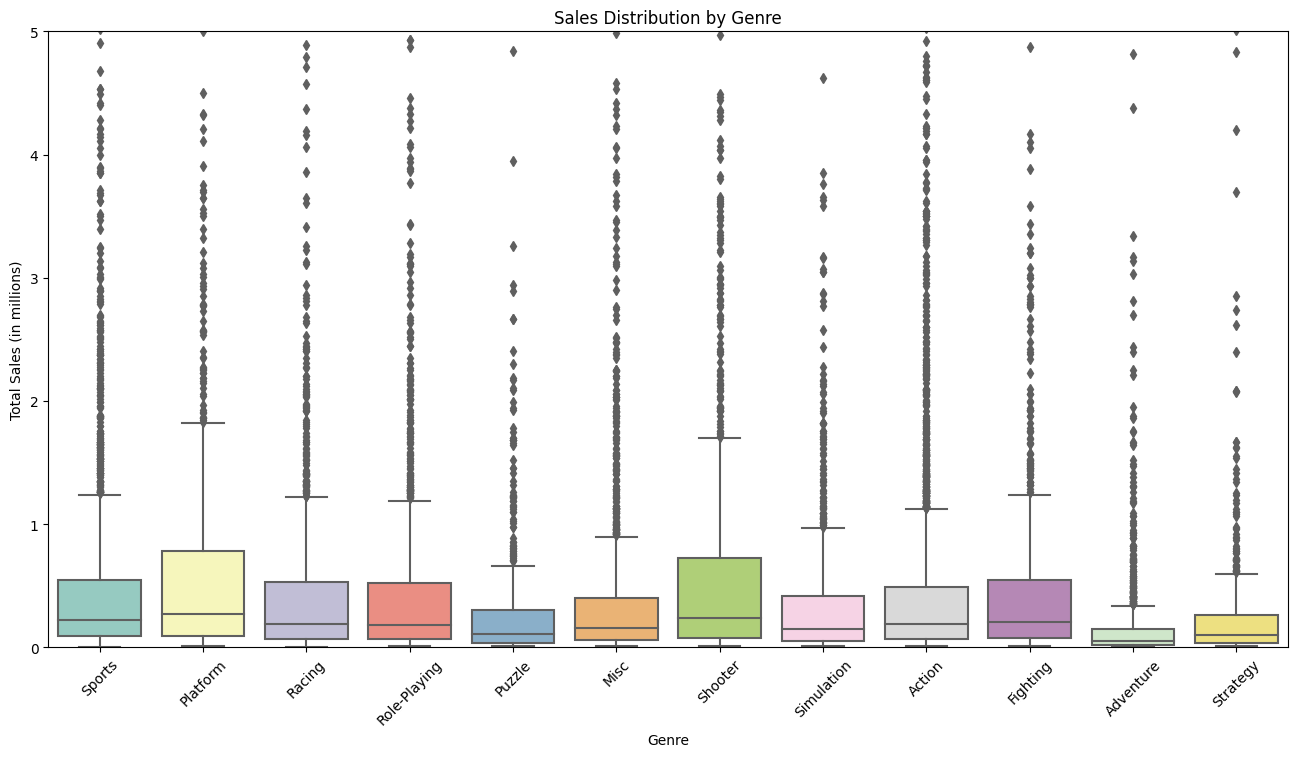

In [25]:
# Calculate average and median sales by genre
average_sales_by_genre = games_dataset.groupby('genre')['total_sales'].mean().sort_values(ascending=False).reset_index()
median_sales_by_genre = games_dataset.groupby('genre')['total_sales'].median().sort_values(ascending=False).reset_index()

# Display the average and median sales by genre
print("Average Sales by Genre:")
print(average_sales_by_genre)
print("\nMedian Sales by Genre:")
print(median_sales_by_genre)

# Boxplot for sales distribution by genre
plt.figure(figsize=(16, 8))
sns.boxplot(x='genre', y='total_sales', data=games_dataset, palette='Set3')
plt.title('Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

    
Brilliant    

**Summary** 

- High Performers: Platform, Shooter, and Sports genres are consistently high performers, both in terms of average and median sales. These genres have many games that perform well, with several achieving very high sales.

- Moderate Performers: Role-Playing, Racing, and Action genres show good performance with moderate median sales and several high outliers.

- Lower Performers: Puzzle, Miscellaneous, Simulation, Adventure, and Strategy genres generally have lower median sales, indicating they are less consistently profitable.

# Step 4. Create a user profile for each region



Region: NA_SALES
Top Platforms:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top Genres:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64




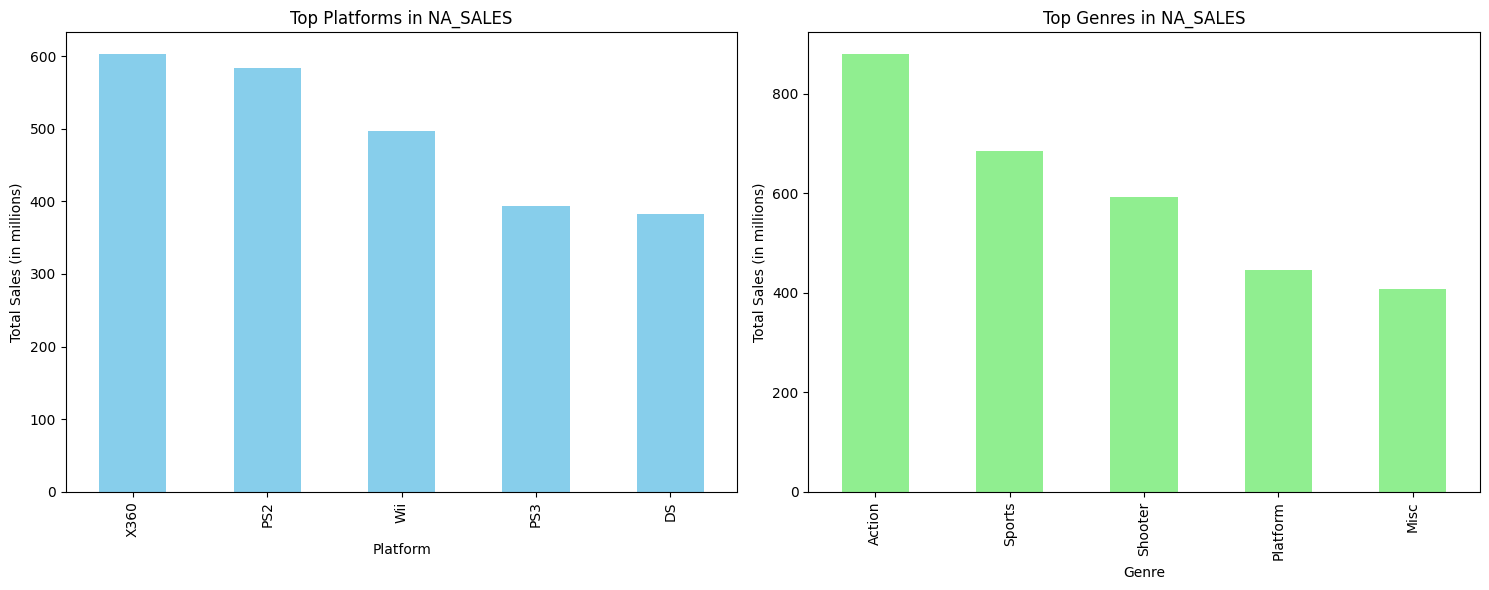

Region: EU_SALES
Top Platforms:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top Genres:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64




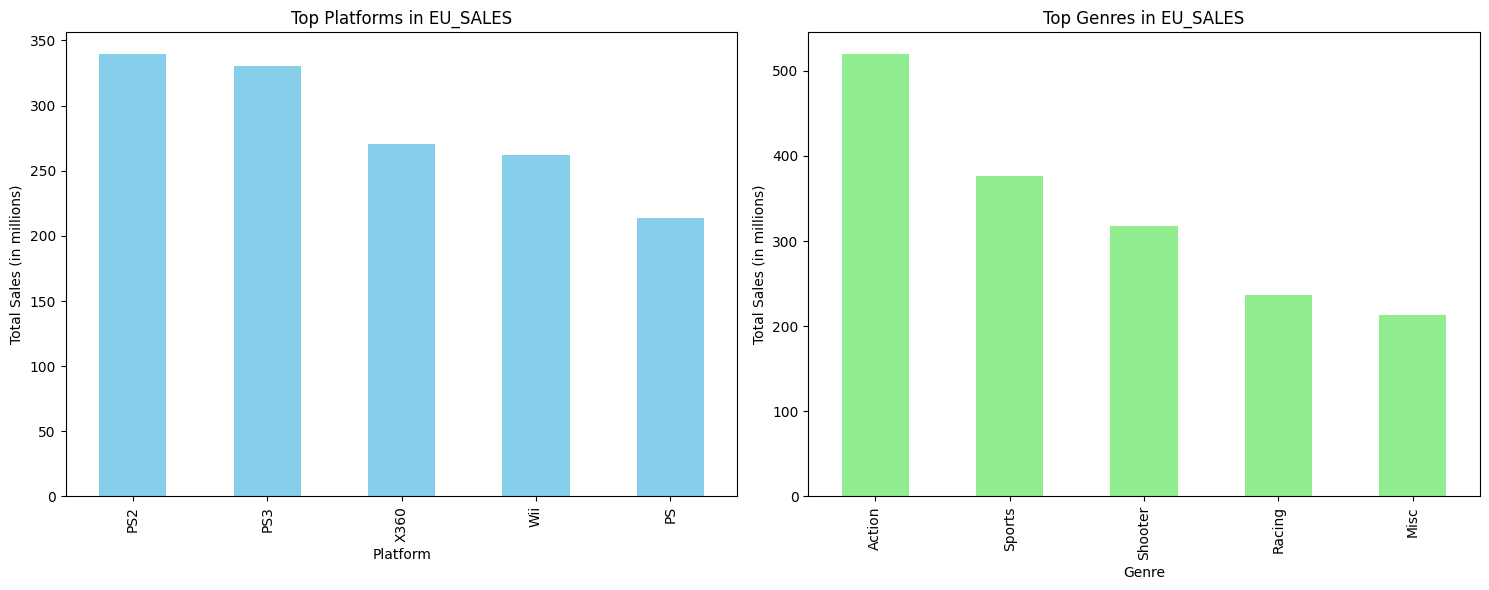

Region: JP_SALES
Top Platforms:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
Top Genres:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64




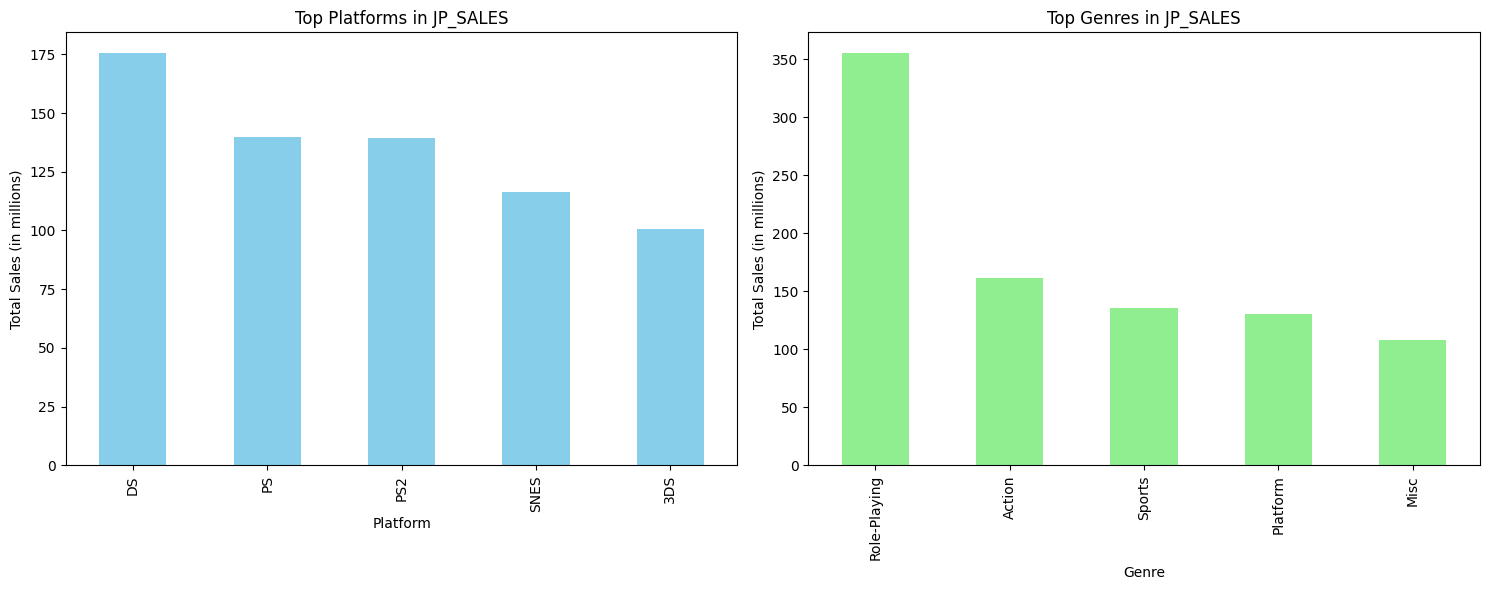

In [26]:
# Create user profiles for each region
regions = ['na_sales', 'eu_sales', 'jp_sales']

region_profiles = {}
for region in regions:
    top_platforms = games_dataset.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    top_genres = games_dataset.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    region_profiles[region] = {'top_platforms': top_platforms, 'top_genres': top_genres}
    
# Function to create bar charts for platforms and genres
def plot_top_platforms_genres(region_name, platforms, genres):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Plot top platforms
    platforms.plot(kind='bar', ax=ax[0], color='skyblue')
    ax[0].set_title(f'Top Platforms in {region_name}')
    ax[0].set_xlabel('Platform')
    ax[0].set_ylabel('Total Sales (in millions)')
    
    # Plot top genres
    genres.plot(kind='bar', ax=ax[1], color='lightgreen')
    ax[1].set_title(f'Top Genres in {region_name}')
    ax[1].set_xlabel('Genre')
    ax[1].set_ylabel('Total Sales (in millions)')
    
    plt.tight_layout()
    plt.show()

# Display the user profiles for each region
for region, profile in region_profiles.items():
    print(f"Region: {region.upper()}")
    print("Top Platforms:")
    print(profile['top_platforms'])
    print("Top Genres:")
    print(profile['top_genres'])
    print("\n")
    
    plot_top_platforms_genres(region.upper(), profile['top_platforms'], profile['top_genres'])


**Variations in Market Shares from Region to Region**

1. Top Platforms:

    - North America:

        - The Xbox 360 leads the market, followed closely by the PlayStation 2 and Wii.
        - Nintendo DS is also quite popular in this region.
        
    - Europe:

        - The PlayStation 2 and PlayStation 3 dominate the market, indicating a stronger preference for PlayStation           consoles.
        - Xbox 360 and Wii have significant shares but are less dominant compared to North America.
        - The original PlayStation also maintains a notable presence.
        
    - Japan:

        - Nintendo platforms are more dominant, with the DS and 3DS leading the market.
        - The Super Nintendo Entertainment System (SNES) and PlayStation (PS) are also significant, indicating a             preference for older consoles.
        - The role-playing genre has a major influence on platform popularity.
        
2. Top Genres:

    - North America:

        - Action and Sports genres are the most popular, followed by Shooter and Platform games.
        - Miscellaneous games also have a considerable market share.

    - Europe:

        - Action and Sports genres are again the most popular, followed by Shooter and Racing games.
        - Miscellaneous games hold a similar market share to North America.
        
    - Japan:

        - Role-Playing games dominate the market, significantly more than in North America and Europe.
        - Action, Sports, and Platform genres are also popular but to a lesser extent.
        - Miscellaneous games have a presence but are not as dominant.



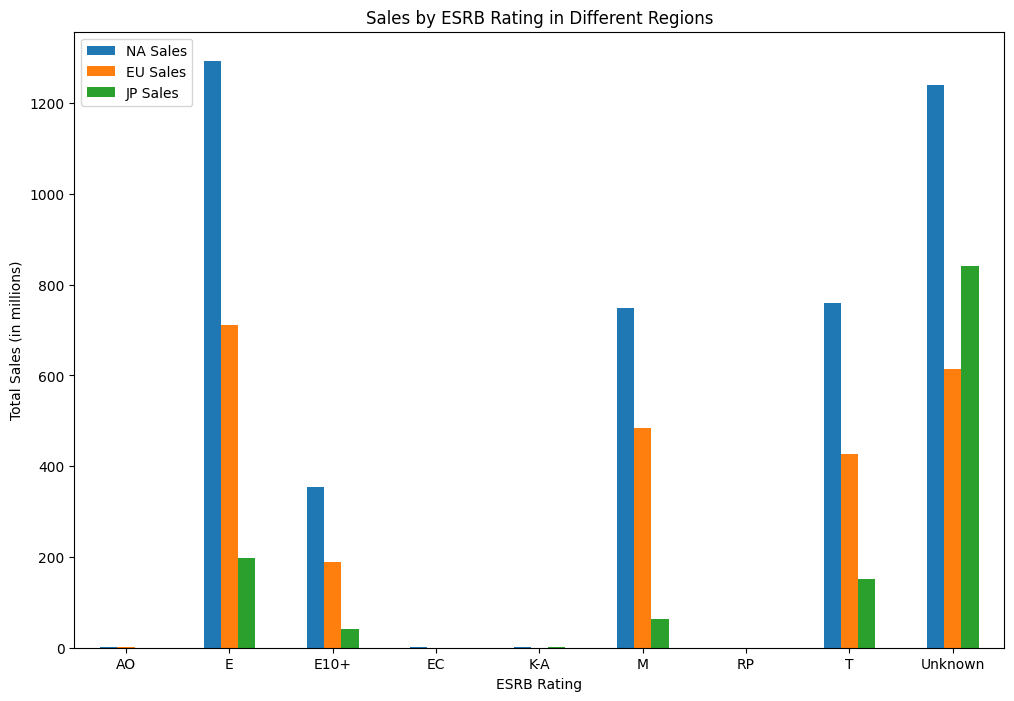

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,0.00,0.08,0.00
T,759.75,427.03,151.40
Unknown,1240.68,613.30,841.93


In [27]:
esrb_sales = games_dataset.groupby('rating')[regions].sum()
# Visualize the results
esrb_sales.plot(kind='bar', figsize=(12, 8))
plt.title('Sales by ESRB Rating in Different Regions')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'])
plt.show()

# Display the sales by ESRB rating
esrb_sales

**Impact of ESRB Ratings:**

The bar chart and sales data indicate the impact of different ESRB ratings on sales in North America, Europe, and Japan:

- E (Everyone):
    - Highest sales across all regions, indicating a strong preference for family-friendly games.
- T (Teen) and M (Mature):
    - Significant sales, particularly in North America and Europe.
- E10+ (Everyone 10+):
    - Moderate sales, indicating a preference for slightly more mature content than E-rated games.
- AO (Adults Only) and EC (Early Childhood):
    - Very low sales, indicating niche markets.
- Unknown:
    - High sales in all regions, particularly in Japan, suggesting a significant number of games with unrated or missing rating information.

**Summary of ESRB Ratings Impact**

- North America: E-rated games dominate, followed by M and T ratings.
- Europe: Similar pattern with E-rated games leading, followed by T and M ratings.
- Japan: E-rated games lead, but the Unknown category shows a significant presence, followed by Role-Playing games.

# Step 5. Test the following hypotheses:



<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the Null and Alternative hypotheses

In [28]:
from scipy import stats

# Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same
xbox_one_ratings = games_dataset[games_dataset['platform'] == 'XOne']['user_score']
pc_ratings = games_dataset[games_dataset['platform'] == 'PC']['user_score']

t_stat1, p_val1 = stats.ttest_ind(xbox_one_ratings.dropna(), pc_ratings.dropna())
print(f"Hypothesis 1 - t-statistic: {t_stat1:.2f}, p-value: {p_val1:.2f}")

# Hypothesis 2: Average user ratings for the Action and Sports genres are different
action_ratings = games_dataset[games_dataset['genre'] == 'Action']['user_score']
sports_ratings = games_dataset[games_dataset['genre'] == 'Sports']['user_score']

t_stat2, p_val2 = stats.ttest_ind(action_ratings.dropna(), sports_ratings.dropna())
print(f"Hypothesis 2 - t-statistic:{t_stat2:.2f}, p-value: {p_val2:.2f}")


Hypothesis 1 - t-statistic: -3.92, p-value: 0.00
Hypothesis 2 - t-statistic:1.13, p-value: 0.26


**Hypothesis Testing Results**

**1. Hypothesis 1:** Average user ratings of the Xbox One and PC platforms are the same.

    - t-statistic: -3.92
    - p-value: 0.00

- **Interpretation:** The p-value is much lower than the commonly used significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference between the average user ratings of the Xbox One and PC platforms.

**2. Hypothesis 2:** Average user ratings for the Action and Sports genres are different.

    - t-statistic: 1.13
    - p-value: 0.26
    
- **Interpretation:** The p-value is higher than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference between the average user ratings for the Action and Sports genres.

**Formulation of Hypotheses**

**1. Hypothesis 1:** Average user ratings of the Xbox One and PC platforms are the same.

- **Null Hypothesis (H0):** The average user ratings for Xbox One and PC platforms are equal.

 
- **Alternative Hypothesis (H1):** The average user ratings for Xbox One and PC platforms are not equal.

 
- **Reasoning:** This hypothesis aims to test whether there is a statistically significant difference between the user ratings of games on Xbox One and PC platforms. By comparing the means, we can determine if user preferences and experiences differ across these platforms.

**2. Hypothesis 2:** Average user ratings for the Action and Sports genres are different.


- **Null Hypothesis (H0):** The average user ratings for Action and Sports genres are equal.


- **Alternative Hypothesis (H1):** The average user ratings for Action and Sports genres are not equal.


- **Reasoning:** This hypothesis tests whether there is a significant difference in user ratings between Action and Sports games. By comparing the means, we can assess if the genre impacts user satisfaction and ratings.

**Significance Level**
- Chosen Significance Level (α): 0.05 (5%)

**Reasoning:**

- The 0.05 significance level is commonly used in statistical hypothesis testing as it represents a good balance between Type I and Type II errors.
- **Type I Error:** Rejecting the null hypothesis when it is true (false positive). By setting 𝛼 to 0.05, we accept a 5% chance of making this error.
- **Type II Error:** Failing to reject the null hypothesis when it is false (false negative). While alpha = 0.05 does not directly control the Type II error, it is widely accepted as a standard threshold in many fields.

Using a significance level of 0.05 ensures that we have a reasonable threshold for detecting true differences without being overly stringent, which could result in missing meaningful differences (higher Type II error rate).

# General Conclusion

The video game industry, characterized by its rapid evolution and diverse market dynamics, requires a deep understanding of the factors driving game success. This project, which analyzed data from various sources up to December 2016, provides crucial insights into the trends and patterns that influence the success of video games. The key findings from this analysis highlight the importance of platforms, genres, reviews, and regional preferences in shaping game sales.

**Key Findings**

1. Release Trends:

- The number of game releases peaked around 2007-2009, with a subsequent decline, indicating changes in industry trends and potential shifts in market focus.

2. Top Platforms:

- The PlayStation 2 (PS2), Xbox 360 (X360), PlayStation 3 (PS3), Wii, and Nintendo DS (DS) emerged as the top platforms in terms of total sales. These platforms have significantly influenced the gaming market during their prime years.

3. Sales Trends:

- Platforms such as PS2, X360, and Wii experienced significant sales peaks, showcasing their popularity and impact on the market. These platforms also displayed wide variability in game success, with several high-performing outliers.

4. Genre Performance:

- High-performing genres include Platform, Shooter, and Sports, which consistently show high average and median sales. Role-Playing, Racing, and Action genres also perform well, while Puzzle, Miscellaneous, Simulation, Adventure, and Strategy genres have lower and less consistent sales.

5. Regional Preferences:

- North America: Strong preference for Xbox 360, with Action and Sports genres being the most popular.
- Europe: Favor PlayStation consoles, with Action and Sports genres leading.
- Japan: Dominated by Nintendo platforms, especially the DS, with Role-Playing games being the most popular genre.

6. Impact of Reviews:

- Critic reviews have a more significant impact on sales compared to user reviews, particularly for platforms like PS3. This suggests that professional opinions are crucial in driving game sales.

7. ESRB Ratings:

- E-rated games (Everyone) dominate sales across all regions, indicating a strong market preference for family-friendly content. T (Teen) and M (Mature) ratings also have significant sales, particularly in North America and Europe.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊